# Step-1 : Importing libraries and the dataset

In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing all the required libraries
import pandas as pd
import numpy as np

In [3]:
# To display all the columns
pd.set_option('display.max_columns', None)

In [4]:
# Importing the datasets
scoring = pd.read_csv("leads.csv")
scoring.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


# Step-2: Data understanding, Preparation and cleaning

In [5]:
# Let's check the dimensions of the dataframe
scoring.shape

(9240, 37)

In [6]:
# let's look at the statistical aspects of the dataframe
scoring.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [7]:
# Let's see the type of each column
scoring.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

#### Data Preparation

In [8]:
# To check the column-wise percentage of the null values

round(scoring.isnull().sum()*100/len(scoring),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [9]:
# Deleting all the columns with more than 35% null values and which are not relevant to the model building like Prospect ID and Lead Number

scoring = scoring.drop(['Tags','Lead Quality','Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score','Prospect ID','Lead Number'], axis=1)

In [10]:
# Deleting all the rows with columns having less than 2% null values

scoring= scoring.dropna(subset=['Lead Source','TotalVisits','Page Views Per Visit','Last Activity'])

In [11]:
# Displaying the %age of unique values in each column

for col in scoring.columns:
    print(round(scoring[col].value_counts()*100/len(scoring[col]),2))
    print('-'*10)

Lead Origin
Landing Page Submission    53.84
API                        39.43
Lead Add Form               6.40
Lead Import                 0.33
Name: count, dtype: float64
----------
Lead Source
Google               31.61
Direct Traffic       28.03
Olark Chat           19.32
Organic Search       12.72
Reference             4.88
Welingak Website      1.42
Referral Sites        1.38
Facebook              0.34
bing                  0.07
google                0.06
Click2call            0.04
Press_Release         0.02
Social Media          0.02
Live Chat             0.02
youtubechannel        0.01
testone               0.01
Pay per Click Ads     0.01
welearnblog_Home      0.01
WeLearn               0.01
blog                  0.01
NC_EDM                0.01
Name: count, dtype: float64
----------
Do Not Email
No     92.11
Yes     7.89
Name: count, dtype: float64
----------
Do Not Call
No     99.98
Yes     0.02
Name: count, dtype: float64
----------
Converted
0    62.14
1    37.86
Name: count,

In [12]:
# Dropping the categorical columns with less than 10% variety for atleast 2 unique values, based on the result in the query above

scoring = scoring.drop(['Do Not Email','Do Not Call','Country','How did you hear about X Education','What matters most to you in choosing a course','Search','Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque'], axis=1)

In [13]:
# See for the revised dataset

scoring.shape

(9074, 13)

In [14]:
# Column of the revised dataset

scoring.columns

Index(['Lead Origin', 'Lead Source', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'What is your current occupation', 'Lead Profile',
       'City', 'A free copy of Mastering The Interview',
       'Last Notable Activity'],
      dtype='object')

In [15]:
# List of binary variables to map

binarylist = ['A free copy of Mastering The Interview']

In [16]:
# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
scoring[binarylist] = scoring[binarylist].apply(binary_map)

In [17]:
scoring.head(2)

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Lead Profile,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,Select,Select,0,Modified
1,API,Organic Search,0,5.0,674,2.5,Email Opened,Select,Unemployed,Select,Select,0,Email Opened


In [18]:
# Checking for the null values

scoring.isnull().sum()

Lead Origin                                  0
Lead Source                                  0
Converted                                    0
TotalVisits                                  0
Total Time Spent on Website                  0
Page Views Per Visit                         0
Last Activity                                0
Specialization                            1431
What is your current occupation           2683
Lead Profile                              2702
City                                      1419
A free copy of Mastering The Interview       0
Last Notable Activity                        0
dtype: int64

In [19]:
# Replacing null values with "Missing" text

scoring = scoring.fillna('Missing')

In [20]:
# Cross checking for the remaining null values

scoring.isnull().sum()

Lead Origin                               0
Lead Source                               0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Specialization                            0
What is your current occupation           0
Lead Profile                              0
City                                      0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

In [21]:
# Checking for outliers in the continuous variables
scoring.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9074 entries, 0 to 9239
Data columns (total 13 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9074 non-null   object 
 1   Lead Source                             9074 non-null   object 
 2   Converted                               9074 non-null   int64  
 3   TotalVisits                             9074 non-null   float64
 4   Total Time Spent on Website             9074 non-null   int64  
 5   Page Views Per Visit                    9074 non-null   float64
 6   Last Activity                           9074 non-null   object 
 7   Specialization                          9074 non-null   object 
 8   What is your current occupation         9074 non-null   object 
 9   Lead Profile                            9074 non-null   object 
 10  City                                    9074 non-null   object 
 

In [22]:
# List of columns with the continuous variables

cont_var = scoring[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']]

In [23]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%

cont_var.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000
mean,3.456028,482.887481,2.370151
std,4.858802,545.256560,2.160871
min,0.000000,0.000000,0.000000
25%,1.000000,11.000000,1.000000
50%,3.000000,246.000000,2.000000
75%,5.000000,922.750000,3.200000
90%,7.000000,1373.000000,5.000000
95%,10.000000,1557.000000,6.000000
99%,17.000000,1839.000000,9.000000


In [24]:
# There are outliers in TotalVisits and Page Views Per Visit. "Total Time Spent on Website" looks okay

In [25]:
# Calculating the Upper whisker limit for TotalVisits and Page Views Per Visit

Q3_TotalVisits = np.percentile(scoring['TotalVisits'], 75)
Q1_TotalVisits = np.percentile(scoring['TotalVisits'], 25)

Q3_PV = np.percentile(scoring['Page Views Per Visit'], 75)
Q1_PV = np.percentile(scoring['Page Views Per Visit'], 25)


IQR_TotalVisits = Q3_TotalVisits - Q1_TotalVisits 
UW_TotalVisits = Q3_TotalVisits + 1.5 * IQR_TotalVisits

IQR_PV = Q3_PV - Q1_PV 
UW_PV = Q3_PV + 1.5 * IQR_PV

print('Upper whisker for TotalVisits: ', UW_TotalVisits)
print('Upper whisker for Page Views Per Visit: ', UW_PV)

Upper whisker for TotalVisits:  11.0
Upper whisker for Page Views Per Visit:  6.5


In [26]:
# Checking the rows of TotalVisits with values more than the upper whisker

scoring[scoring['TotalVisits']>UW_TotalVisits].shape[0]

267

In [27]:
# Deleting the rows with values above upper whisker limit for TotalVisits column

scoring = scoring[scoring['TotalVisits'] <= UW_TotalVisits]

In [28]:
# Checking the rows of Page Views Per Visit with values more than the upper whisker

scoring[scoring['Page Views Per Visit']>UW_PV].shape[0]

294

In [29]:
# Deleting the rows with values above upper whisker limit for Page Views Per Visit column

scoring = scoring[scoring['Page Views Per Visit'] <= UW_PV]

In [30]:
# Looking at the shape of the dataset after completing the data cleaning
scoring.shape

(8513, 13)

In [31]:
# To check the information around the column and its type

scoring.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8513 entries, 0 to 9239
Data columns (total 13 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             8513 non-null   object 
 1   Lead Source                             8513 non-null   object 
 2   Converted                               8513 non-null   int64  
 3   TotalVisits                             8513 non-null   float64
 4   Total Time Spent on Website             8513 non-null   int64  
 5   Page Views Per Visit                    8513 non-null   float64
 6   Last Activity                           8513 non-null   object 
 7   Specialization                          8513 non-null   object 
 8   What is your current occupation         8513 non-null   object 
 9   Lead Profile                            8513 non-null   object 
 10  City                                    8513 non-null   object 
 

In [32]:
# Explore each object categorical column one by one to see the values and make necessary changes

scoring['Last Notable Activity'].value_counts()*100/len(scoring)

Last Notable Activity
Modified                        36.638083
Email Opened                    30.917420
SMS Sent                        23.834136
Page Visited on Website          2.901445
Olark Chat Conversation          2.055680
Email Link Clicked               1.891225
Email Bounced                    0.693058
Unsubscribed                     0.505110
Unreachable                      0.352402
Had a Phone Conversation         0.129214
Email Marked Spam                0.023493
Approached upfront               0.011747
Resubscribed to emails           0.011747
View in browser link Clicked     0.011747
Form Submitted on Website        0.011747
Email Received                   0.011747
Name: count, dtype: float64

In [33]:
# Dropping columns with more than 50% missing values

scoring = scoring.drop('Lead Profile', axis=1)
scoring = scoring.drop('City', axis=1)

In [34]:
# Data cleaning for the columns where there are repitions or merging values with low count (<1%) to "Others". Also replacing "Select" with Missing"

scoring['Lead Source'] = scoring['Lead Source'].replace('google', 'Google')
scoring['Lead Source'] = scoring['Lead Source'].replace(['Facebook','bing','Click2call','Social Media','Live Chat','Press_Release','Pay per Click Ads','blog','WeLearn','welearnblog_Home','youtubechannel','testone','NC_EDM'], 'Others')
scoring['Last Activity'] = scoring['Last Activity'].replace(['Unreachable','Unsubscribed','View in browser link Clicked','Approached upfront','Email Received','Email Marked Spam','Visited Booth in Tradeshow','Resubscribed to emails','Had a Phone Conversation'], 'Others')
scoring['Specialization'] = scoring['Specialization'].replace('Select', 'Missing')
scoring['Specialization'] = scoring['Specialization'].replace(['Rural and Agribusiness','E-Business','Services Excellence'], 'Others')
scoring['What is your current occupation'] = scoring['What is your current occupation'].replace(['Other','Housewife','Businessman'], 'Others')
scoring['Last Notable Activity'] = scoring['Last Notable Activity'].replace(['Email Bounced','Unsubscribed','Unreachable','Had a Phone Conversation','Email Marked Spam','Approached upfront','Resubscribed to emails','View in browser link Clicked','Form Submitted on Website','Email Received'], 'Others')

In [35]:
# Creating dummy variables for the remaining categorical variables and dropping the level with lowest count

# Creating dummy variables for the variable 'Lead Origin'
lo = pd.get_dummies(scoring['Lead Origin'], prefix='Lead_Origin', dtype=int)
# Dropping Lead_Origin_Lead Import column
lo1 = lo.drop(['Lead_Origin_Lead Import'], axis=1)
#Adding the results to the master dataframe
scoring = pd.concat([scoring,lo1], axis=1)

# Creating dummy variables for the variable 'Lead Source'
ls = pd.get_dummies(scoring['Lead Source'], prefix='Lead_Source', dtype=int)
# Dropping Lead_Source_Others column
ls1 = ls.drop(['Lead_Source_Others'], axis=1)
#Adding the results to the master dataframe
scoring = pd.concat([scoring,ls1], axis=1)

# Creating dummy variables for the variable 'Last Activity'
la = pd.get_dummies(scoring['Last Activity'], prefix='Last_Activity', dtype=int)
# Dropping Last_Activity_Others column
la1 = la.drop(['Last_Activity_Others'], axis=1)
#Adding the results to the master dataframe
scoring = pd.concat([scoring,la1], axis=1)

# Creating dummy variables for the variable 'Specialization'
sp = pd.get_dummies(scoring['Specialization'], prefix='Specialization', dtype=int)
# Dropping Specialization_Missing column
sp1 = sp.drop(['Specialization_Missing'], axis=1)
#Adding the results to the master dataframe
scoring = pd.concat([scoring,sp1], axis=1)

# Creating dummy variables for the variable 'What is your current occupation'
co = pd.get_dummies(scoring['What is your current occupation'], prefix='Current_Occupation', dtype=int)
# Dropping Current_Occupation_Missing column
co1 = co.drop(['Current_Occupation_Missing'], axis=1)
#Adding the results to the master dataframe
scoring = pd.concat([scoring,co1], axis=1)

# Creating dummy variables for the variable 'Last Notable Activity'
na = pd.get_dummies(scoring['Last Notable Activity'], prefix='Notable_Activity', dtype=int)
# Dropping Notable_Activity_Others column
na1 = na.drop(['Notable_Activity_Others'], axis=1)
#Adding the results to the master dataframe
scoring = pd.concat([scoring,na1], axis=1)

In [36]:
# Dropping the repeated variables after we created the dummies

scoring = scoring.drop(['Lead Origin','Lead Source','Last Activity','Specialization','What is your current occupation','Last Notable Activity'], axis=1)

In [37]:
scoring.shape

(8513, 49)

In [38]:
# Checking the information around the final columns

scoring.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8513 entries, 0 to 9239
Data columns (total 49 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Converted                                         8513 non-null   int64  
 1   TotalVisits                                       8513 non-null   float64
 2   Total Time Spent on Website                       8513 non-null   int64  
 3   Page Views Per Visit                              8513 non-null   float64
 4   A free copy of Mastering The Interview            8513 non-null   int64  
 5   Lead_Origin_API                                   8513 non-null   int32  
 6   Lead_Origin_Landing Page Submission               8513 non-null   int32  
 7   Lead_Origin_Lead Add Form                         8513 non-null   int32  
 8   Lead_Source_Direct Traffic                        8513 non-null   int32  
 9   Lead_Source_Google      

# Step-3: EDA (Exploratory data analysis)

In [39]:
# Importing matplotlib and seaborn

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Step-4: Model Building and Testing

#### Test-Train Split

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
# Putting feature variable to X
X = scoring.drop(['Converted'], axis=1)

X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead_Origin_API,Lead_Origin_Landing Page Submission,Lead_Origin_Lead Add Form,Lead_Source_Direct Traffic,Lead_Source_Google,Lead_Source_Olark Chat,Lead_Source_Organic Search,Lead_Source_Reference,Lead_Source_Referral Sites,Lead_Source_Welingak Website,Last_Activity_Converted to Lead,Last_Activity_Email Bounced,Last_Activity_Email Link Clicked,Last_Activity_Email Opened,Last_Activity_Form Submitted on Website,Last_Activity_Olark Chat Conversation,Last_Activity_Page Visited on Website,Last_Activity_SMS Sent,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Current_Occupation_Others,Current_Occupation_Student,Current_Occupation_Unemployed,Current_Occupation_Working Professional,Notable_Activity_Email Link Clicked,Notable_Activity_Email Opened,Notable_Activity_Modified,Notable_Activity_Olark Chat Conversation,Notable_Activity_Page Visited on Website,Notable_Activity_SMS Sent
0,0.0,0,0.0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
1,5.0,674,2.5,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
2,2.0,1532,2.0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
3,1.0,305,1.0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
4,2.0,1428,1.0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0


In [42]:
# Putting response variable to y
y = scoring['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [43]:
# Splitting the data into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

#### Feature Scaling

In [44]:
from sklearn.preprocessing import StandardScaler

In [45]:
scaler = StandardScaler()

X_train[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead_Origin_API,Lead_Origin_Landing Page Submission,Lead_Origin_Lead Add Form,Lead_Source_Direct Traffic,Lead_Source_Google,Lead_Source_Olark Chat,Lead_Source_Organic Search,Lead_Source_Reference,Lead_Source_Referral Sites,Lead_Source_Welingak Website,Last_Activity_Converted to Lead,Last_Activity_Email Bounced,Last_Activity_Email Link Clicked,Last_Activity_Email Opened,Last_Activity_Form Submitted on Website,Last_Activity_Olark Chat Conversation,Last_Activity_Page Visited on Website,Last_Activity_SMS Sent,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Current_Occupation_Others,Current_Occupation_Student,Current_Occupation_Unemployed,Current_Occupation_Working Professional,Notable_Activity_Email Link Clicked,Notable_Activity_Email Opened,Notable_Activity_Modified,Notable_Activity_Olark Chat Conversation,Notable_Activity_Page Visited on Website,Notable_Activity_SMS Sent
5123,-1.153092,-0.867873,-1.253080,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
6322,-0.743258,0.108309,-0.648118,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
3644,1.305912,-0.842280,0.561805,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
3011,0.896078,-0.451076,0.259325,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
8140,-0.743258,-0.767330,-0.648118,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0


In [46]:
### Checking the Converted Rate
converted = (sum(scoring['Converted'])/len(scoring['Converted'].index))*100
converted

37.66004933630918

##### We have almost 38% converted rate

### Model Building

In [47]:
import statsmodels.api as sm

#### Feature Selection Using RFE
Since there are lot of variables, we will use RFE for selection of 15 variables

In [48]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [49]:
from sklearn.feature_selection import RFE

rfe = RFE(logreg, n_features_to_select = 15)
rfe = rfe.fit(X_train, y_train)

In [50]:
rfe.support_

array([False,  True, False, False, False, False,  True, False, False,
        True, False,  True, False,  True, False,  True, False,  True,
       False,  True, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True,  True,  True,  True, False,  True,  True,
       False, False, False])

In [51]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 27),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 28),
 ('A free copy of Mastering The Interview', False, 31),
 ('Lead_Origin_API', False, 30),
 ('Lead_Origin_Landing Page Submission', False, 7),
 ('Lead_Origin_Lead Add Form', True, 1),
 ('Lead_Source_Direct Traffic', False, 2),
 ('Lead_Source_Google', False, 5),
 ('Lead_Source_Olark Chat', True, 1),
 ('Lead_Source_Organic Search', False, 4),
 ('Lead_Source_Reference', True, 1),
 ('Lead_Source_Referral Sites', False, 3),
 ('Lead_Source_Welingak Website', True, 1),
 ('Last_Activity_Converted to Lead', False, 24),
 ('Last_Activity_Email Bounced', True, 1),
 ('Last_Activity_Email Link Clicked', False, 32),
 ('Last_Activity_Email Opened', True, 1),
 ('Last_Activity_Form Submitted on Website', False, 33),
 ('Last_Activity_Olark Chat Conversation', True, 1),
 ('Last_Activity_Page Visited on Website', False, 25),
 ('Last_Activity_SMS Sent', True, 1),
 ('Specialization_Banking, Investment 

In [52]:
rfe_col = X_train.columns[rfe.support_]
rfe_col

Index(['Total Time Spent on Website', 'Lead_Origin_Lead Add Form',
       'Lead_Source_Olark Chat', 'Lead_Source_Reference',
       'Lead_Source_Welingak Website', 'Last_Activity_Email Bounced',
       'Last_Activity_Email Opened', 'Last_Activity_Olark Chat Conversation',
       'Last_Activity_SMS Sent', 'Current_Occupation_Others',
       'Current_Occupation_Student', 'Current_Occupation_Unemployed',
       'Current_Occupation_Working Professional',
       'Notable_Activity_Email Opened', 'Notable_Activity_Modified'],
      dtype='object')

#### Assessing the model with StatsModels

#### Model-1

In [53]:
X_train_sm = sm.add_constant(X_train[rfe_col])
ml1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result1 = ml1.fit()
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5959
Model:                            GLM   Df Residuals:                     5943
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2395.6
Date:                Tue, 19 Nov 2024   Deviance:                       4791.2
Time:                        15:14:42   Pearson chi2:                 5.75e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4068
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -2.3201      0.141    -16.440      0.000      -2.597      -2.044
Total Time Spent on Website                 1.1071      0.042     26.265      0.000       1.025       1.190
Lead_Origin_Lead Add Form                   2.0408      0.920      2.219      0.026       0.238       3.843
Lead_Source_Olark Chat                      1.4048      0.109     12.877      0.000       1.191       1.619
Lead_Source_Reference                       1.6230      0.944      1.719      0.086      -0.228       3.474
Lead_Source_Welingak Website                4.0298      1.365      2.952      0.003       1.354       6.706
Last_Activity_Email Bounced                -1.4668      0.364     -4.027      0.000      -2.181      -0.753
Last_Activity_Email Opened                  1.0044      0.164      6.109      0.000       0.682       1.327
Last_Activity_Olark Chat Conversation      -0.8703      0.195     -4.471      0.000      -1.252      -0.489
Last_Activity_SMS Sent                      1.3869      0.120     11.555      0.000       1.152       1.622
Current_Occupation_Others                   2.6631      0.619      4.301      0.000       1.450       3.877
Current_Occupation_Student                  1.2526      0.232      5.397      0.000       0.798       1.707
Current_Occupation_Unemployed               1.1724      0.091     12.944      0.000       0.995       1.350
Current_Occupation_Working Professional     3.7584      0.210     17.921      0.000       3.347       4.169
Notable_Activity_Email Opened              -0.8698      0.180     -4.845      0.000      -1.222      -0.518
Notable_Activity_Modified                  -0.9172      0.112     -8.180      0.000      -1.137      -0.697
===========================================================================================================
"""

In [54]:
# Getting the predicted values on the train set
y_train_pred = result1.predict(X_train_sm)
y_train_pred[:10]

5123    0.143206
6322    0.125095
3644    0.047541
3011    0.173660
8140    0.051443
1339    0.881159
211     0.873391
661     0.742658
2120    0.143206
475     0.844207
dtype: float64

In [55]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.14320619, 0.12509527, 0.04754099, 0.17365981, 0.05144259,
       0.88115883, 0.87339077, 0.74265797, 0.14320619, 0.84420743])

#### Creating a dataframe with the actual converted flag and the predicted probabilities

In [56]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Convert_Prob':y_train_pred})
y_train_pred_final['Lead Number'] = y_train.index
y_train_pred_final.head()

,Converted,Convert_Prob,Lead Number
0,0,0.143206,5123
1,0,0.125095,6322
2,0,0.047541,3644
3,0,0.173660,3011
4,0,0.051443,8140


#### Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0

In [57]:
y_train_pred_final['Predicted'] = y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head of the dataset
y_train_pred_final.head()

,Converted,Convert_Prob,Lead Number,Predicted
0,0,0.143206,5123,0
1,0,0.125095,6322,0
2,0,0.047541,3644,0
3,0,0.173660,3011,0
4,0,0.051443,8140,0


In [58]:
from sklearn import metrics

In [59]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted)
print(confusion)

[[3294  412]
 [ 699 1554]]


In [60]:
# Let's check the overall accuracy

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.8135593220338984


#### Checking VIFs

In [61]:
# Check for the VIF values of the feature variables

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [62]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train[rfe_col].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_col].values, i) for i in range(X_train[rfe_col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Lead_Origin_Lead Add Form,67.88
3,Lead_Source_Reference,53.00
4,Lead_Source_Welingak Website,15.86
6,Last_Activity_Email Opened,7.71
13,Notable_Activity_Email Opened,7.23
11,Current_Occupation_Unemployed,2.50
14,Notable_Activity_Modified,2.17
2,Lead_Source_Olark Chat,1.85
7,Last_Activity_Olark Chat Conversation,1.83
8,Last_Activity_SMS Sent,1.78


##### There are a few variables with high VIF. It's best to drop these variables as they aren't helping much with prediction and unnecessarily making the model complex. The variable 'Lead_Origin_Lead Add Form' has the highest VIF. So let's start by dropping that.

In [63]:
rfe_col = rfe_col.drop('Lead_Origin_Lead Add Form', 1)

#### Model-2

In [64]:
# Let's re-run the model using the revised variables

X_train_sm = sm.add_constant(X_train[rfe_col])
ml2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result2 = ml2.fit()
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5959
Model:                            GLM   Df Residuals:                     5944
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2398.2
Date:                Tue, 19 Nov 2024   Deviance:                       4796.4
Time:                        15:14:42   Pearson chi2:                 5.74e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4063
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -2.3150      0.141    -16.431      0.000      -2.591      -2.039
Total Time Spent on Website                 1.1036      0.042     26.223      0.000       1.021       1.186
Lead_Source_Olark Chat                      1.4004      0.109     12.851      0.000       1.187       1.614
Lead_Source_Reference                       3.6548      0.233     15.700      0.000       3.199       4.111
Lead_Source_Welingak Website                6.0615      1.013      5.983      0.000       4.076       8.047
Last_Activity_Email Bounced                -1.4697      0.364     -4.037      0.000      -2.183      -0.756
Last_Activity_Email Opened                  1.0083      0.164      6.136      0.000       0.686       1.330
Last_Activity_Olark Chat Conversation      -0.8728      0.195     -4.486      0.000      -1.254      -0.491
Last_Activity_SMS Sent                      1.3826      0.120     11.538      0.000       1.148       1.617
Current_Occupation_Others                   2.6632      0.619      4.302      0.000       1.450       3.877
Current_Occupation_Student                  1.2516      0.232      5.396      0.000       0.797       1.706
Current_Occupation_Unemployed               1.1762      0.090     12.997      0.000       0.999       1.354
Current_Occupation_Working Professional     3.7567      0.210     17.920      0.000       3.346       4.168
Notable_Activity_Email Opened              -0.8751      0.179     -4.878      0.000      -1.227      -0.524
Notable_Activity_Modified                  -0.9206      0.112     -8.219      0.000      -1.140      -0.701
===========================================================================================================
"""

In [65]:
y_train_pred = result2.predict(X_train_sm).values.reshape(-1)

In [66]:
y_train_pred[:10]

array([0.14372695, 0.12566025, 0.04792605, 0.17524319, 0.05184467,
       0.88132758, 0.87338899, 0.7428433 , 0.14372695, 0.84440592])

In [67]:
y_train_pred_final['Convert_Prob'] = y_train_pred

In [68]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0

y_train_pred_final['Predicted'] = y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Convert_Prob,Lead Number,Predicted
0,0,0.143727,5123,0
1,0,0.125660,6322,0
2,0,0.047926,3644,0
3,0,0.175243,3011,0
4,0,0.051845,8140,0


In [69]:
# Let's check the overall accuracy

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.8130558818593724


##### Overall the accuracy hasn't dropped much

In [70]:
# Let's check the VIFs again

In [71]:
vif = pd.DataFrame()
vif['Features'] = X_train[rfe_col].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_col].values, i) for i in range(X_train[rfe_col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,Last_Activity_Email Opened,7.70
12,Notable_Activity_Email Opened,7.23
10,Current_Occupation_Unemployed,2.50
13,Notable_Activity_Modified,2.17
1,Lead_Source_Olark Chat,1.85
6,Last_Activity_Olark Chat Conversation,1.83
7,Last_Activity_SMS Sent,1.78
0,Total Time Spent on Website,1.33
11,Current_Occupation_Working Professional,1.32
2,Lead_Source_Reference,1.25


In [72]:
# Let's drop Last_Activity_Email Opened since it has a high VIF

rfe_col = rfe_col.drop('Last_Activity_Email Opened')

#### Model-3

In [73]:
# Let's re-run the model using the revised variables

X_train_sm = sm.add_constant(X_train[rfe_col])
ml3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result3 = ml3.fit()
result3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5959
Model:                            GLM   Df Residuals:                     5945
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2416.8
Date:                Tue, 19 Nov 2024   Deviance:                       4833.6
Time:                        15:14:43   Pearson chi2:                 5.81e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4026
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -2.1379      0.135    -15.801      0.000      -2.403      -1.873
Total Time Spent on Website                 1.1030      0.042     26.354      0.000       1.021       1.185
Lead_Source_Olark Chat                      1.4491      0.109     13.297      0.000       1.235       1.663
Lead_Source_Reference                       3.7152      0.233     15.944      0.000       3.258       4.172
Lead_Source_Welingak Website                6.1387      1.014      6.054      0.000       4.151       8.126
Last_Activity_Email Bounced                -1.7643      0.359     -4.920      0.000      -2.467      -1.061
Last_Activity_Olark Chat Conversation      -1.2122      0.184     -6.575      0.000      -1.574      -0.851
Last_Activity_SMS Sent                      1.1585      0.111     10.407      0.000       0.940       1.377
Current_Occupation_Others                   2.6171      0.607      4.310      0.000       1.427       3.807
Current_Occupation_Student                  1.2656      0.232      5.454      0.000       0.811       1.720
Current_Occupation_Unemployed               1.1790      0.090     13.070      0.000       1.002       1.356
Current_Occupation_Working Professional     3.7400      0.209     17.934      0.000       3.331       4.149
Notable_Activity_Email Opened              -0.0577      0.122     -0.471      0.637      -0.297       0.182
Notable_Activity_Modified                  -0.7375      0.106     -6.948      0.000      -0.945      -0.529
===========================================================================================================
"""

In [74]:
# Since p-value of "Notable_Activity_Email Opened" is high, we will drop the column

rfe_col = rfe_col.drop('Notable_Activity_Email Opened')

#### Model-4

In [75]:
# Let's re-run the model using the revised variables

X_train_sm = sm.add_constant(X_train[rfe_col])
ml4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result4 = ml4.fit()
result4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5959
Model:                            GLM   Df Residuals:                     5946
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2416.9
Date:                Tue, 19 Nov 2024   Deviance:                       4833.8
Time:                        15:14:43   Pearson chi2:                 5.81e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4025
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -2.1827      0.097    -22.584      0.000      -2.372      -1.993
Total Time Spent on Website                 1.1034      0.042     26.364      0.000       1.021       1.185
Lead_Source_Olark Chat                      1.4484      0.109     13.296      0.000       1.235       1.662
Lead_Source_Reference                       3.7153      0.233     15.940      0.000       3.258       4.172
Lead_Source_Welingak Website                6.1399      1.014      6.055      0.000       4.152       8.128
Last_Activity_Email Bounced                -1.7392      0.354     -4.907      0.000      -2.434      -1.045
Last_Activity_Olark Chat Conversation      -1.1901      0.178     -6.676      0.000      -1.539      -0.841
Last_Activity_SMS Sent                      1.1959      0.078     15.296      0.000       1.043       1.349
Current_Occupation_Others                   2.6168      0.608      4.307      0.000       1.426       3.808
Current_Occupation_Student                  1.2629      0.232      5.444      0.000       0.808       1.718
Current_Occupation_Unemployed               1.1806      0.090     13.099      0.000       1.004       1.357
Current_Occupation_Working Professional     3.7426      0.209     17.949      0.000       3.334       4.151
Notable_Activity_Modified                  -0.7063      0.083     -8.494      0.000      -0.869      -0.543
===========================================================================================================
"""

In [76]:
y_train_pred = result4.predict(X_train_sm).values.reshape(-1)

In [77]:
y_train_pred[:10]

array([0.08331212, 0.16954382, 0.0667477 , 0.09920437, 0.07208765,
       0.89314223, 0.78132438, 0.7434474 , 0.08331212, 0.85266448])

In [78]:
y_train_pred_final['Convert_Prob'] = y_train_pred

In [79]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0

y_train_pred_final['Predicted'] = y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Convert_Prob,Lead Number,Predicted
0,0,0.083312,5123,0
1,0,0.169544,6322,0
2,0,0.066748,3644,0
3,0,0.099204,3011,0
4,0,0.072088,8140,0


In [80]:
# Let's check the overall accuracy

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.8117133747273032


##### The accuracy is still practically the same

In [81]:
# Let's now check the VIFs again

In [82]:
vif = pd.DataFrame()
vif['Features'] = X_train[rfe_col].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_col].values, i) for i in range(X_train[rfe_col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Lead_Source_Olark Chat,1.71
9,Current_Occupation_Unemployed,1.68
5,Last_Activity_Olark Chat Conversation,1.63
11,Notable_Activity_Modified,1.63
6,Last_Activity_SMS Sent,1.46
0,Total Time Spent on Website,1.33
2,Lead_Source_Reference,1.25
10,Current_Occupation_Working Professional,1.22
4,Last_Activity_Email Bounced,1.10
3,Lead_Source_Welingak Website,1.06


##### All variables have a good value of VIF. So we need not drop any more variables and we can proceed with making predictions using this model only

In [83]:
# Let's take a look at the confusion matrix again 

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted)
confusion

array([[3295,  411],
       [ 711, 1542]], dtype=int64)

In [84]:
# Let's check the overall accuracy

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.8117133747273032

### Metrics beyond simply accuracy

In [85]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [86]:
# Let's see the sensitivity of our logistic regression model

TP / float(TP+FN)

0.6844207723035952

In [87]:
# Let us calculate specificity

TN / float(TN+FP)

0.8890987587695629

In [88]:
# Calculate false positive rate - Predicting convert when customer is not converted

print(FP/ float(TN+FP))

0.11090124123043713


In [89]:
# positive predictive value 

print (TP / float(TP+FP))

0.7895545314900153


In [90]:
# Negative predictive value

print (TN / float(TN+ FN))

0.8225162256615077


#### Plotting the ROC Curve

ROC curve demonstrates several things:
- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity)
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test

In [91]:
def draw_roc(actual, probs):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs, drop_intermediate = False )
    auc_score = metrics.roc_auc_score(actual, probs)
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [92]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Convert_Prob, drop_intermediate = False )

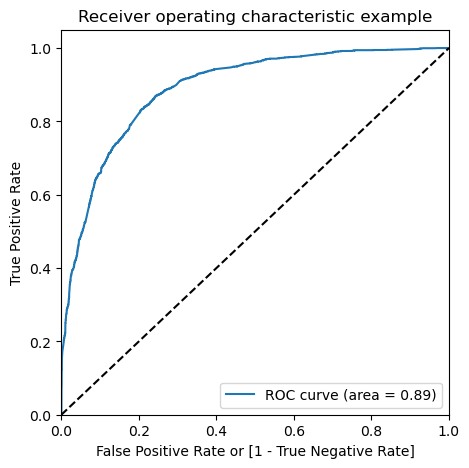

In [93]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Convert_Prob)

#### ROC curve area is 0.89 which is good

#### Finding Optimal Cutoff Point

In [94]:
# Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [95]:
# Let's create columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Convert_Prob,Lead Number,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.083312,5123,0,1,0,0,0,0,0,0,0,0,0
1,0,0.169544,6322,0,1,1,0,0,0,0,0,0,0,0
2,0,0.066748,3644,0,1,0,0,0,0,0,0,0,0,0
3,0,0.099204,3011,0,1,0,0,0,0,0,0,0,0,0
4,0,0.072088,8140,0,1,0,0,0,0,0,0,0,0,0


In [96]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i])
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.378084  1.000000  0.000000
0.1   0.1  0.642725  0.971593  0.442795
0.2   0.2  0.761369  0.921438  0.664058
0.3   0.3  0.798624  0.869951  0.755262
0.4   0.4  0.810203  0.762539  0.839180
0.5   0.5  0.811713  0.684421  0.889099
0.6   0.6  0.803155  0.613848  0.918241
0.7   0.7  0.776976  0.500222  0.945224
0.8   0.8  0.754489  0.404350  0.967350
0.9   0.9  0.714382  0.263648  0.988397


In [97]:
# Finding the optimal threshold value 
sensitivities, specificities, accuracies = [], [], []

sensitivities.append(sensi)
specificities.append(speci)
accuracies.append(accuracy)

# Find the threshold where sensitivity and specificity are closest
differences = np.abs(np.array(specificities) - np.array(sensitivities))
meeting_index = np.argmin(differences)
optimal_threshold = thresholds[meeting_index]
print(f"Optimal Threshold: {optimal_threshold:.2f}")

Optimal Threshold: 2.00


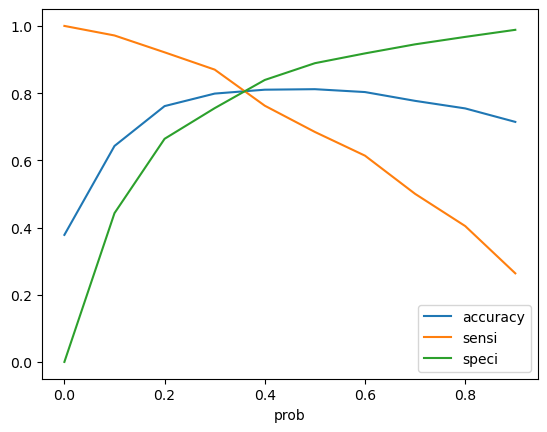

In [98]:
# Let's plot accuracy sensitivity and specificity for various probabilities

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.legend()
plt.show()

#### From the curve above, 0.38 is the optimum point to take it as a cutoff probability

In [99]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.38 else 0)

y_train_pred_final.head()

,Converted,Convert_Prob,Lead Number,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.083312,5123,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.169544,6322,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.066748,3644,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.099204,3011,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.072088,8140,0,1,0,0,0,0,0,0,0,0,0,0


In [100]:
# Let's check the overall accuracy

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.808524920288639

In [101]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted)
confusion2

array([[3064,  642],
       [ 499, 1754]], dtype=int64)

In [102]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [103]:
# Let's see the sensitivity of our logistic regression model

TP / float(TP+FN)

0.7785175321793165

In [104]:
# Let us calculate specificity

TN / float(TN+FP)

0.8267674042093902

In [105]:
# Calculate false positive rate - Predicting convert when customer did not convert

print(FP/ float(TN+FP))

0.17323259579060982


#### Positive predictive value 

print (TP / float(TP+FP))

In [106]:
# Negative predictive value

print (TN / float(TN+ FN))

0.8599494807746281


### Precision and Recall

In [107]:
#Looking at the confusion matrix again

In [108]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted)
confusion

array([[3295,  411],
       [ 711, 1542]], dtype=int64)

#### Precision
- TP / TP + FP

In [109]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7895545314900153

##### Recall
- TP / TP + FN

In [110]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.6844207723035952

In [111]:
# Using sklearn utilities for the same
from sklearn.metrics import precision_score, recall_score

In [112]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.7895545314900153

In [113]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.6844207723035952

#### Precision and recall tradeoff

In [114]:
from sklearn.metrics import precision_recall_curve

In [115]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       0
 1       0
 2       0
 3       0
 4       0
        ..
 5954    0
 5955    0
 5956    0
 5957    0
 5958    0
 Name: Converted, Length: 5959, dtype: int64,
 0       0
 1       0
 2       0
 3       0
 4       0
        ..
 5954    0
 5955    0
 5956    0
 5957    0
 5958    0
 Name: Predicted, Length: 5959, dtype: int64)

In [116]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Convert_Prob)

In [117]:
# Compute threshold value

f1_scores = 2 * (p * r) / (p + r)
optimal_idx = np.argmax(f1_scores)
optimal_threshold = thresholds[optimal_idx]
print(f"Optimal Threshold: {optimal_threshold:.2f}")

Optimal Threshold: 0.37


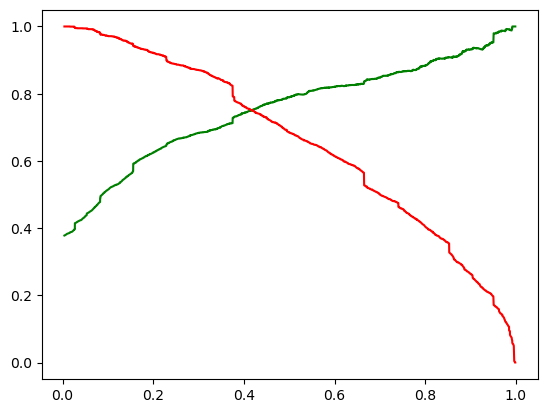

In [118]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Making predictions on the Test set

In [119]:
X_test[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']])

In [120]:
X_test = X_test[rfe_col]
X_test.head()

,Total Time Spent on Website,Lead_Source_Olark Chat,Lead_Source_Reference,Lead_Source_Welingak Website,Last_Activity_Email Bounced,Last_Activity_Olark Chat Conversation,Last_Activity_SMS Sent,Current_Occupation_Others,Current_Occupation_Student,Current_Occupation_Unemployed,Current_Occupation_Working Professional,Notable_Activity_Modified
7358,-0.191492,0,0,0,0,0,0,0,0,1,0,1
8398,2.528656,0,0,0,0,0,0,0,0,1,0,1
3472,-0.584524,0,0,0,0,0,0,0,0,0,0,0
8673,0.671351,0,0,0,0,0,0,0,0,0,0,0
8053,1.477524,0,0,0,0,0,1,0,0,1,0,0


In [121]:
X_test_sm = sm.add_constant(X_test)

In [122]:
# Making predictions on the test set

y_test_pred = result4.predict(X_test_sm)

In [123]:
y_test_pred[:10]

7358    0.127899
8398    0.746830
3472    0.055850
8673    0.191255
8053    0.861068
6385    0.175933
5396    0.128162
7152    0.083312
7013    0.516284
7903    0.155533
dtype: float64

In [124]:
# Converting y_pred to a dataframe which is an array

y_pred_1 = pd.DataFrame(y_test_pred)

In [125]:
# Let's see the head

y_pred_1.head()

,0
7358,0.127899
8398,0.746830
3472,0.055850
8673,0.191255
8053,0.861068


In [126]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [127]:
# Putting CustID to index

y_test_df['Lead Number'] = y_test_df.index

In [128]:
# Removing index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [129]:
# Appending y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [130]:
y_pred_final.head()

,Converted,Lead Number,0
0,0,7358,0.127899
1,0,8398,0.746830
2,0,3472,0.055850
3,1,8673,0.191255
4,1,8053,0.861068


In [131]:
# Renaming the column 

y_pred_final= y_pred_final.rename(columns={ 0 : 'Convert_Prob'})

In [132]:
# Rearranging the columns

y_pred_final = y_pred_final.reindex(['Lead Number','Converted','Convert_Prob'], axis=1)

In [133]:
# Let's see the head of y_pred_final

y_pred_final.head()

,Lead Number,Converted,Convert_Prob
0,7358,0,0.127899
1,8398,0,0.746830
2,3472,0,0.055850
3,8673,1,0.191255
4,8053,1,0.861068


In [134]:
y_pred_final['final_predicted'] = y_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.37 else 0)

In [135]:
y_pred_final.head()

,Lead Number,Converted,Convert_Prob,final_predicted
0,7358,0,0.127899,0
1,8398,0,0.746830,1
2,3472,0,0.055850,0
3,8673,1,0.191255,0
4,8053,1,0.861068,1


In [136]:
# Let's check the overall accuracy

metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8007047768206734

In [137]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted)
confusion2

array([[1259,  342],
       [ 167,  786]], dtype=int64)

In [138]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [139]:
# Let's see the sensitivity of our logistic regression model

TP / float(TP+FN)

0.8247639034627492

In [140]:
# Let us calculate specificity

TN / float(TN+FP)

0.7863835103060587

# ---------- The End ----------